In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
sentences = ["apple banana fruit", "banana orange fruit", "orange apple fruit",
              "dog cat animal", "cat monkey animal", "monkey dog animal"]
# 단어 분리 후 추가
sample = []
for i in sentences:
  for j in i.split():
    sample.append(j)

# 중복 제거
vocab = set(sample)
vocab_size = len(vocab)

# 단어 : 인덱스
word_to_idx = {word:index for index,word in enumerate(vocab)}
# 인덱스 : 단어
idx_to_word = {index: index for index,word in enumerate(vocab)}    

In [3]:
# window = 2
def make_data(sentence):
  data = []
  for i in range(2, len(sample)-2):
    target = [sample[i-2], sample[i-1], sample[i+1], sample[i+2]]
    context = sample[i]
    for j in target:
      data.append((context, j))
  return data

def make_convert_vector(context, word_to_idx):
  idxs = word_to_idx[context]
  return torch.tensor(idxs, dtype = torch.long)

skip_gram = make_data(sample)

In [4]:
embedding_size = 2

class Word2Vec(nn.Module):
  def __init__(self, vocab_size, embedding_size):
    super(Word2Vec, self).__init__()

    self.W = nn.Linear(vocab_size, embedding_size, bias = False)
    self.WT = nn.Linear(embedding_size,vocab_size, bias = False)

  def forward(self, inputs):
    hidden_layer = self.W(inputs)
    output_layer = self.WT(hidden_layer)
    return output_layer

In [5]:
model = Word2Vec(vocab_size,embedding_size)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [6]:
def one_hot_encoding(index, word_to_index):
  one_hot_vector = [0]*(len(word_to_index))
  one_hot_vector[index-1] = 1
  return torch.Tensor(one_hot_vector)

one_hot_encoding(2,word_to_idx)  

tensor([0., 1., 0., 0., 0., 0., 0., 0.])

In [7]:
EPOCH = 5000

for i in range(EPOCH):
  total_loss = 0
  # Gradient 초기화
  optimizer.zero_grad()
  for context, target in skip_gram:
    context_v = make_convert_vector(context, word_to_idx)
    context_vector = one_hot_encoding(context_v,word_to_idx)
    output = model(context_vector)
    label = torch.tensor(word_to_idx[target])
    total_loss += criterion(output,label)
  if (i + 1) % 100 == 0:
    print('Epoch:', '%04d' % (i + 1), 'loss =', '{:.6f}'.format(total_loss))  
  total_loss.backward()
  optimizer.step()

Epoch: 0100 loss = 114.651375
Epoch: 0200 loss = 110.853188
Epoch: 0300 loss = 105.684929
Epoch: 0400 loss = 100.148911
Epoch: 0500 loss = 95.144150
Epoch: 0600 loss = 91.213226
Epoch: 0700 loss = 88.263550
Epoch: 0800 loss = 86.019203
Epoch: 0900 loss = 84.290359
Epoch: 1000 loss = 82.981087
Epoch: 1100 loss = 82.012527
Epoch: 1200 loss = 81.295975
Epoch: 1300 loss = 80.758690
Epoch: 1400 loss = 80.349243
Epoch: 1500 loss = 80.031136
Epoch: 1600 loss = 79.778763
Epoch: 1700 loss = 79.574394
Epoch: 1800 loss = 79.405823
Epoch: 1900 loss = 79.264587
Epoch: 2000 loss = 79.144524
Epoch: 2100 loss = 79.041176
Epoch: 2200 loss = 78.951172
Epoch: 2300 loss = 78.871986
Epoch: 2400 loss = 78.801689
Epoch: 2500 loss = 78.738708
Epoch: 2600 loss = 78.681885
Epoch: 2700 loss = 78.630203
Epoch: 2800 loss = 78.582924
Epoch: 2900 loss = 78.539429
Epoch: 3000 loss = 78.499130
Epoch: 3100 loss = 78.461662
Epoch: 3200 loss = 78.426605
Epoch: 3300 loss = 78.393654
Epoch: 3400 loss = 78.362595
Epoch: 350

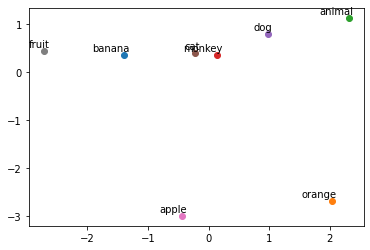

In [8]:
for i, label in enumerate(vocab):
    W, WT = model.parameters()
    x, y = W[0][i].item(), W[1][i].item()
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()

In [9]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            ;                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

'                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        '